In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

%matplotlib inline
sn.set(rc={'figure.figsize':(9,3)})

In [352]:
envios = pd.read_csv('envios.txt', delimiter='|', parse_dates=['fecha'], index_col=['fecha'])
ventas = pd.read_csv('ventas.txt', delimiter='|', parse_dates=['fecha'], index_col=['fecha'])
pos = pd.read_csv('pos.csv')

In [353]:
pos.head()

,id_pos,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,...,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
0,-37,9.0,60769.03000,84420.06500,32715.700,5.260000,4.33000,4.245000,4.71000,5.935000,...,22.880000,2.395000,21.44000,10.60,1.935000,3.055000,26.00500,1.360000,16.475000,434685.4150
1,-37,6.0,39675.89000,50716.23000,29985.710,8.860000,8.60000,8.170000,7.58000,8.950000,...,10.610000,0.230000,25.97000,2.51,0.550000,2.910000,0.47000,0.000000,1.380000,143807.1500
2,-37,36.0,65351.97750,82575.15000,7610.355,6.460000,6.29625,6.088750,5.75875,7.031250,...,20.667500,1.328750,29.25625,8.87,0.257500,0.742500,0.17125,0.013750,2.360000,212977.4850
3,-37,25.0,62489.12167,84227.44333,5685.860,6.288333,7.19000,6.958333,6.15000,5.841667,...,25.001667,1.513333,22.80500,8.90,0.221667,1.056667,0.00500,0.266667,2.091667,219048.1067
4,-37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [354]:
ventas.head()

,id_pos,unidades,canal
fecha,,,
2012-10-01,8495,4,MAXIKIOSCO
2012-10-10,8571,1,MAXIKIOSCO
2012-10-11,8915,1,MAXIKIOSCO
2012-10-12,8915,3,MAXIKIOSCO
2012-10-13,8923,1,MAXIKIOSCO


In [355]:
envios.head()

,id_pos,unidades_despachadas,cantidad_envios
fecha,,,
2012-08-17,5235,36,1
2012-08-24,4611,48,1
2012-08-24,4645,48,1
2012-08-24,4649,72,1
2012-08-24,4677,72,1


Preguntas:
Principal: Cuanto venderá cada pos en Diciembre del 2014?

Otras:
- Son relevantes los datos de envio? Hay pos que hayan recibido más de un envio en un mes y haya agotado stock?

In [356]:
# Let's clean pos table

In [357]:
pos['id_pos'] = pd.to_numeric(pos['id_pos'], 'coerce')
pos.dropna(subset=['id_pos'], inplace=True)
pos = pos[pos['id_pos'] > 0]

In [358]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266436 entries, 2012-10-01 to 2014-11-30
Data columns (total 3 columns):
id_pos      266436 non-null int64
unidades    266436 non-null int64
canal       266436 non-null object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


In [359]:
# Let's start by getting December values and extracting them

In [360]:
december_index_2012 = pd.date_range(start='2012-12-01', end='2012-12-31', freq='D')
december_index_2013 = pd.date_range(start='2013-12-01', end='2013-12-31', freq='D')

In [361]:
targets_2012 = ventas.loc[ventas.index.isin(december_index_2012)].groupby(['id_pos']).sum()
targets_2013 = ventas.loc[ventas.index.isin(december_index_2013)].groupby(['id_pos']).sum()

In [362]:
ventas = ventas[~ventas.index.isin(december_index_2012)]
ventas = ventas[~ventas.index.isin(december_index_2013)]

In [363]:
ventas = ventas.drop(columns=['canal']).reset_index()

In [364]:
ventas = ventas.groupby(['id_pos', 'fecha']).sum()
ventas.head()

unidades
id_pos fecha               
3143   2013-11-30         2
3144   2012-11-01         1
       2012-11-03         1
       2012-11-14         1
       2012-11-19         1

In [365]:
# Let's make three datasets one for 2012 and another for 2013 and last one for 2014
# Starting by it's indexes
index_2012 = pd.date_range(start='2012-01-01', end='2012-11-30', freq='W')
index_2013 = pd.date_range(start='2013-01-01', end='2013-11-30', freq='W')
index_2014 = pd.date_range(start='2014-01-01', end='2014-11-30', freq='W')

In [366]:
ventas = ventas.reset_index()

In [367]:
ventas_2012 = ventas.loc[ventas['fecha'].isin(index_2012)].groupby(['id_pos', 'fecha']).sum()
ventas_2012.head()

,,unidades
id_pos,fecha,
3150,2012-11-25,1
3154,2012-11-25,1
3159,2012-11-25,1
3165,2012-11-18,1
3168,2012-11-04,1


In [368]:
ventas_2013 = ventas.loc[ventas['fecha'].isin(index_2013)].groupby(['id_pos', 'fecha']).sum()
ventas_2013.head()

,,unidades
id_pos,fecha,
3147,2013-11-17,2
3150,2013-11-24,4
3154,2013-11-24,1
3158,2013-11-24,1
3159,2013-11-24,2


In [369]:
ventas_2014 = ventas.loc[ventas['fecha'].isin(index_2014)].groupby(['id_pos', 'fecha']).sum()
ventas_2014.head()

unidades
id_pos fecha               
3151   2014-11-09         1
3156   2014-11-23         1
       2014-11-30         1
3163   2014-11-23         1
3167   2014-11-30         2

In [370]:
pos.columns

Index(['id_pos', 'competidores', 'ingreso_mediana', 'ingreso_promedio',
       'densidad_poblacional', 'pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19',
       'pct_20a24', 'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44',
       'pct_45a49', 'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69',
       'pct_70a74', 'pct_75a79', 'pct_80a84', 'pct_85ainf', 'pct_bachelors',
       'pct_doctorados', 'pct_secundario', 'pct_master', 'pct_bicicleta',
       'pct_omnibus', 'pct_subtes', 'pct_taxi', 'pct_caminata',
       'mediana_valor_hogar'],
      dtype='object')

In [373]:
droppeable_columns = ['pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19',
       'pct_20a24', 'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44',
       'pct_45a49', 'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69',
       'pct_70a74', 'pct_75a79', 'pct_80a84', 'pct_85ainf',
       'mediana_valor_hogar', 'ingreso_mediana', 'competidores',
        'pct_taxi', 'pct_subtes', 'pct_omnibus', 'pct_master',
        'pct_bicicleta', 'pct_bachelors', 'pct_doctorados',
                     'pct_secundario']

In [374]:
# pos = pos.set_index('id_pos')
pos = pos.drop(droppeable_columns, axis=1)
pos.fillna(0, inplace=True)

In [375]:
index_2012 = pd.date_range(start='2012-10-01', end='2012-11-30', freq='W')
index_2013 = pd.date_range(start='2013-10-01', end='2013-11-30', freq='W')
index_2014 = pd.date_range(start='2014-10-01', end='2014-11-30', freq='W')

In [376]:
idx_2012_to_i = {value: count for count, value in enumerate(index_2012)}
idx_2013_to_i = {value: count for count, value in enumerate(index_2013)}
idx_2014_to_i = {value: count for count, value in enumerate(index_2014)}

In [377]:
X_2012 = pd.DataFrame(columns=[i for i in range(12)], index=ventas_2012.index.get_level_values('id_pos'))

In [378]:
X_2013 = pd.DataFrame(columns=[i for i in range(12)], index=ventas_2013.index.get_level_values('id_pos'))

In [379]:
X_2014 = pd.DataFrame(columns=[i for i in range(12)], index=ventas_2014.index.get_level_values('id_pos'))

In [380]:
def structurize(X_old, X_new, idx_to_i):
    for index, row in X_old.iterrows():
        id_pos, fecha = index

        if fecha in idx_to_i.keys():
            X_new.loc[id_pos, idx_to_i[fecha]] = row['unidades']
        else:
            continue
    X_new = X_new.fillna(0)
    
    return X_new

In [381]:
X_2012 = structurize(ventas_2012, X_2012, idx_2012_to_i)
X_2012.head()

,0,1,2,3,4,5,6,7,8,9,10,11
id_pos,,,,,,,,,,,,
3150,0,0,0,0,0,0,0,1,0,0,0,0
3154,0,0,0,0,0,0,0,1,0,0,0,0
3159,0,0,0,0,0,0,0,1,0,0,0,0
3165,0,0,0,0,0,0,1,0,0,0,0,0
3168,0,0,0,0,1,0,0,5,0,0,0,0


In [382]:
X_2013 = structurize(ventas_2013, X_2013, idx_2013_to_i)
X_2013.head()

,0,1,2,3,4,5,6,7,8,9,10,11
id_pos,,,,,,,,,,,,
3147,0,0,0,0,0,0,2,0,0,0,0,0
3150,0,0,0,0,0,0,0,4,0,0,0,0
3154,0,0,0,0,0,0,0,1,0,0,0,0
3158,0,0,0,0,0,0,0,1,0,0,0,0
3159,0,0,0,0,0,0,0,2,0,0,0,0


In [383]:
X_2014 = structurize(ventas_2014, X_2014, idx_2014_to_i)
X_2014.head()

,0,1,2,3,4,5,6,7,8,9,10,11
id_pos,,,,,,,,,,,,
3151,0,0,0,0,0,1,0,0,0,0,0,0
3156,0,0,0,0,0,0,0,1,1,0,0,0
3156,0,0,0,0,0,0,0,1,1,0,0,0
3163,0,0,0,0,0,0,0,1,0,0,0,0
3167,0,0,0,0,0,0,0,0,2,0,0,0


In [384]:
# Now let's join it to pos
# TODO: Analize Nan's
X_2012 = pos.join(X_2012).fillna(0).drop_duplicates().drop('id_pos', axis=1)
X_2013 = pos.join(X_2013).fillna(0).drop_duplicates().drop('id_pos', axis=1)
X_2014 = pos.join(X_2014).fillna(0).drop_duplicates().drop('id_pos', axis=1)

In [385]:
targets_2012 = targets_2012.reindex(pos.index, copy=False).fillna(0)
targets_2013 = targets_2013.reindex(pos.index, copy=False).fillna(0)
targets_2014 = pd.Series(index=pos.index)

In [386]:
from sklearn.metrics import accuracy_score

def print_accuracy(y, pred):
    comparation = pd.DataFrame({'true': y.values.flatten(), 'predicted': pred})
    print("Total: ", accuracy_score(comparation['true'], np.round(comparation['predicted'])))
    
    non_zero = comparation[comparation['true'] != 0]
    print("Non-zero: ", accuracy_score(non_zero['true'], np.round(non_zero['predicted'])))

In [387]:
import xgboost as xgb

In [415]:
dTrain = xgb.DMatrix(X_2012, label=targets_2012.values.flatten())
dTest = xgb.DMatrix(X_2013, label=targets_2013.values.flatten())

In [484]:
params = {
    'random_state': 42, 
    'objective': 'reg:squarederror',
    'learning_rate': 1,
    'n_estimator': 100,
    'max_depth': 5,
    'normalize_type': 'forest',
    'rate_drop': 0.1,
}

xgb_model = xgb.train(params, dTrain, 1)

In [485]:
pred = xgb_model.predict(xgb.DMatrix(X_2013))

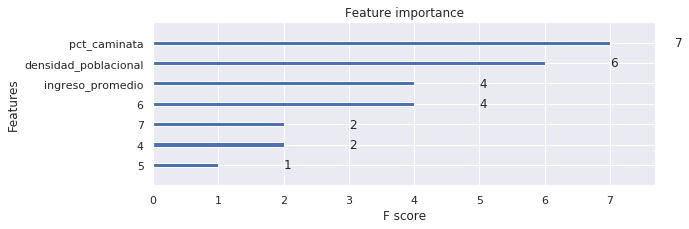

In [486]:
xgb.plot_importance(xgb_model)

In [487]:
print_accuracy(targets_2013, pred)

Total:  0.022330774598743892
Non-zero:  0.03586550435865504


In [392]:
xgb_model.save_model('0001.model')

In [393]:
preds = xgb_model.predict(X_2014)

In [394]:
prediction = pd.Series(np.round(preds), name='Prediction')

In [395]:
submit_data = pd.DataFrame({'id_pos': X_2014.reset_index()['index'], 'prediction': prediction})

In [396]:
submit_data['prediction'] = submit_data['prediction'].round()

In [397]:
submit_data.describe()

,id_pos,prediction
count,12897.000000,12897.000000
mean,6629.000000,13.449717
std,3723.187546,8.693168
min,181.000000,9.000000
25%,3405.000000,11.000000
50%,6629.000000,11.000000
75%,9853.000000,11.000000
max,13077.000000,65.000000
